In [55]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
import pandas as pd
import time
from selenium.webdriver.common.keys import Keys  # Note the capital 'K' in 'Keys'
from selenium.webdriver.support import expected_conditions as EC  # Corrected spelling
from bs4 import BeautifulSoup 


In [56]:
serv_obj=Service(r"C:\Users\Owner\OneDrive\Desktop\python_project_M\chromedriver.exe")
driver=webdriver.Chrome(service=serv_obj)

driver.get("https://www.naukri.com/browse-jobs")
driver.implicitly_wait(2)

input_search=driver.find_element(By.XPATH,'//*[@id="skill"]/div[1]/div[2]/input')

#input_search.send_keys('web scraping')
input_search.send_keys('Data Analyst')

button=driver.find_element(By.XPATH,'//*[@id="qsbFormBtn"]').click()

In [57]:
soup=BeautifulSoup(driver.page_source,'html')
posting=soup.find_all('div',class_='srp-jobtuple-wrapper')
#print("number of jobs in one page",len(posting))

#df=pd.DataFrame({'JobURL':[''],'Designation':[''],'Company_name':[''],'Location':[''],'Experience':[''],'Salary':['']})
#df

In [58]:
# Import necessary modules
from selenium.common.exceptions import NoSuchElementException
import time
import requests

# Get user input for the number of pages to scrape
num_pages_to_scrape = int(input("Enter the number of pages to scrape: "))

for _ in range(num_pages_to_scrape):
    try:
        soup = BeautifulSoup(driver.page_source, 'html')
        posting = soup.find_all('div', class_='srp-jobtuple-wrapper')

        
        for post in posting:
            JobURL = post.find('a', class_='title')['href']
            # print(JobURL)
            Designation = post.find('a', class_='title').text
            # print(Designation)

            # Check if the 'comp-name mw-25' element is present
            company_element = post.find('a', class_='comp-name mw-25')
            company_name = company_element.text if company_element else 'Not specified'
            # print(company_name)

            Location = post.find('span', class_='locWdth').text
            print(Location)
            Experience = post.find('span', class_='expwdth').text
            # print(Experience)

            # Check if the 'Salary' element is present
            salary_element = post.find('span', class_='ni-job-tuple-icon ni-job-tuple-icon-srp-rupee sal')
            Salary = salary_element.text if salary_element else 'Not disclosed'
            # print(Salary)

            # Append the data as a dictionary to the list
            result_data.append({'JobURL': JobURL, 'Designation': Designation, 'company_name': company_name,
                                'Location': Location, 'Experience': Experience, 'Salary': Salary})

        try:
            # Find the 'Next' button and click it
            button = BeautifulSoup(driver.page_source, 'html').select_one('#lastCompMark > a:nth-child(4)')
            button.click()
        except NoSuchElementException:
            print("No more pages to scrape.")
            break
        except Exception as e:
            print("Error while navigating to the next page:", e)
            # Add a short delay before retrying
            time.sleep(2)
    except requests.exceptions.ConnectionError as ce:
        print("Connection error:", ce)
        # Add a short delay before retrying
        time.sleep(2)
    except Exception as ex:
        print("An unexpected error occurred:", ex)
        break

# Create the DataFrame using the list of dictionaries
result_df = pd.DataFrame(result_data)

# Print or further process the DataFrame
print(result_df)




Enter the number of pages to scrape: 10
Bangalore/Bengaluru
Bangalore/Bengaluru
Mumbai, Pune, Pune mumbai
Mumbai
Noida, Uttar Pradesh, New Delhi, Delhi, Gurugram, Haryana
Bangalore/Bengaluru
Bangalore/Bengaluru
Hybrid - Bangalore Rural, Karnataka, Delhi / NCR
Gurugram, Haryana
Hyderabad, Bengaluru, Mumbai (All Areas)
Hyderabad/Secunderabad
Trivandrum/Thiruvananthapuram
Hyderabad/Secunderabad
Bangalore/Bengaluru
Rajkot, Gujarat
New Delhi, Delhi
Hybrid - Noida, Uttar Pradesh, Delhi / NCR
Bangalore/Bengaluru
Mumbai (All Areas)
Hyderabad/Secunderabad
Error while navigating to the next page: 'NoneType' object is not callable
Bangalore/Bengaluru
Bangalore/Bengaluru
Mumbai, Pune, Pune mumbai
Mumbai
Noida, Uttar Pradesh, New Delhi, Delhi, Gurugram, Haryana
Bangalore/Bengaluru
Bangalore/Bengaluru
Hybrid - Bangalore Rural, Karnataka, Delhi / NCR
Gurugram, Haryana
Hyderabad, Bengaluru, Mumbai (All Areas)
Hyderabad/Secunderabad
Trivandrum/Thiruvananthapuram
Hyderabad/Secunderabad
Bangalore/Bengalu

In [59]:
print(len(result_df))


1360


In [60]:
result_df.head(10)

,JobURL,Designation,company_name,Location,Experience,Salary
0,https://www.naukri.com/job-listings-data-analy...,Data Analyst,Magic Bus,"Noida, Uttar Pradesh",3-8 Yrs,3.5-6 Lacs PA
1,https://www.naukri.com/job-listings-data-analy...,Data Analyst | 3-6 years | Mumbai,Svamaan,Mumbai,3-6 Yrs,10-15 Lacs PA (Including Variable: 15.0%)
2,https://www.naukri.com/job-listings-data-analy...,Data Analyst,Not specified,Mumbai,4-9 Yrs,Not disclosed
3,https://www.naukri.com/job-listings-data-analy...,Data Analyst,Paytm,Noida,2-4 Yrs,Not disclosed
4,https://www.naukri.com/job-listings-data-analy...,Data Analyst,Not specified,Mumbai (All Areas)(Powai),2-5 Yrs,Not disclosed
5,https://www.naukri.com/job-listings-data-analy...,Data Analyst,Not specified,"Kolkata, Mumbai, New Delhi, Hyderabad/Secunder...",3-5 Yrs,Not disclosed
6,https://www.naukri.com/job-listings-data-and-i...,Data and Integration Analyst,Not specified,Hyderabad/Secunderabad,2-5 Yrs,Not disclosed
7,https://www.naukri.com/job-listings-data-analy...,Data Analyst and Cloud Practices,Blue Rose Technologies Pvt. Ltd,Bangalore/Bengaluru,0-2 Yrs,Not disclosed
8,https://www.naukri.com/job-listings-data-analy...,Data Analyst,Facctum,Bangalore/Bengaluru,0-2 Yrs,Not disclosed
9,https://www.naukri.com/job-listings-data-analy...,Data Analyst,Rotex,"Mumbai, Pune",0-4 Yrs,Not disclosed


In [61]:
result_df.tail()

,JobURL,Designation,company_name,Location,Experience,Salary
1355,https://www.naukri.com/job-listings-data-analy...,Data Analyst,Excitel Broadband,"New Delhi, Delhi",2-5 Yrs,Not disclosed
1356,https://www.naukri.com/job-listings-data-analy...,Data Analyst - Immediate Hiring,Flexsin Technologies,"Hybrid - Noida, Uttar Pradesh, Delhi / NCR",5-10 Yrs,Not disclosed
1357,https://www.naukri.com/job-listings-data-analy...,Data Analyst,ANZ,Bangalore/Bengaluru,1-5 Yrs,Not disclosed
1358,https://www.naukri.com/job-listings-looking-fo...,Looking For A Data Analyst Andheri Immediate J...,Millennium Organisation,Mumbai (All Areas),1-4 Yrs,2.5-4.25 Lacs PA
1359,https://www.naukri.com/job-listings-data-analy...,Data Analyst,Sub-K IMPACT Solutions Ltd.,Hyderabad/Secunderabad,0-2 Yrs,Not disclosed


 #Save the DataFrame to a CSV file

In [62]:

result_df.to_csv('job_data.csv', index=False)


                                              JobURL  \
0  https://www.naukri.com/job-listings-data-analy...   
1  https://www.naukri.com/job-listings-data-analy...   
2  https://www.naukri.com/job-listings-data-analy...   
3  https://www.naukri.com/job-listings-data-analy...   
4  https://www.naukri.com/job-listings-data-analy...   

                         Designation   company_name  \
0                       Data Analyst      Magic Bus   
1  Data Analyst | 3-6 years | Mumbai        Svamaan   
2                       Data Analyst  Not specified   
3                       Data Analyst          Paytm   
4                       Data Analyst  Not specified   

                    Location Experience  \
0       Noida, Uttar Pradesh    3-8 Yrs   
1                     Mumbai    3-6 Yrs   
2                     Mumbai    4-9 Yrs   
3                      Noida    2-4 Yrs   
4  Mumbai (All Areas)(Powai)    2-5 Yrs   

                                      Salary  
0                         

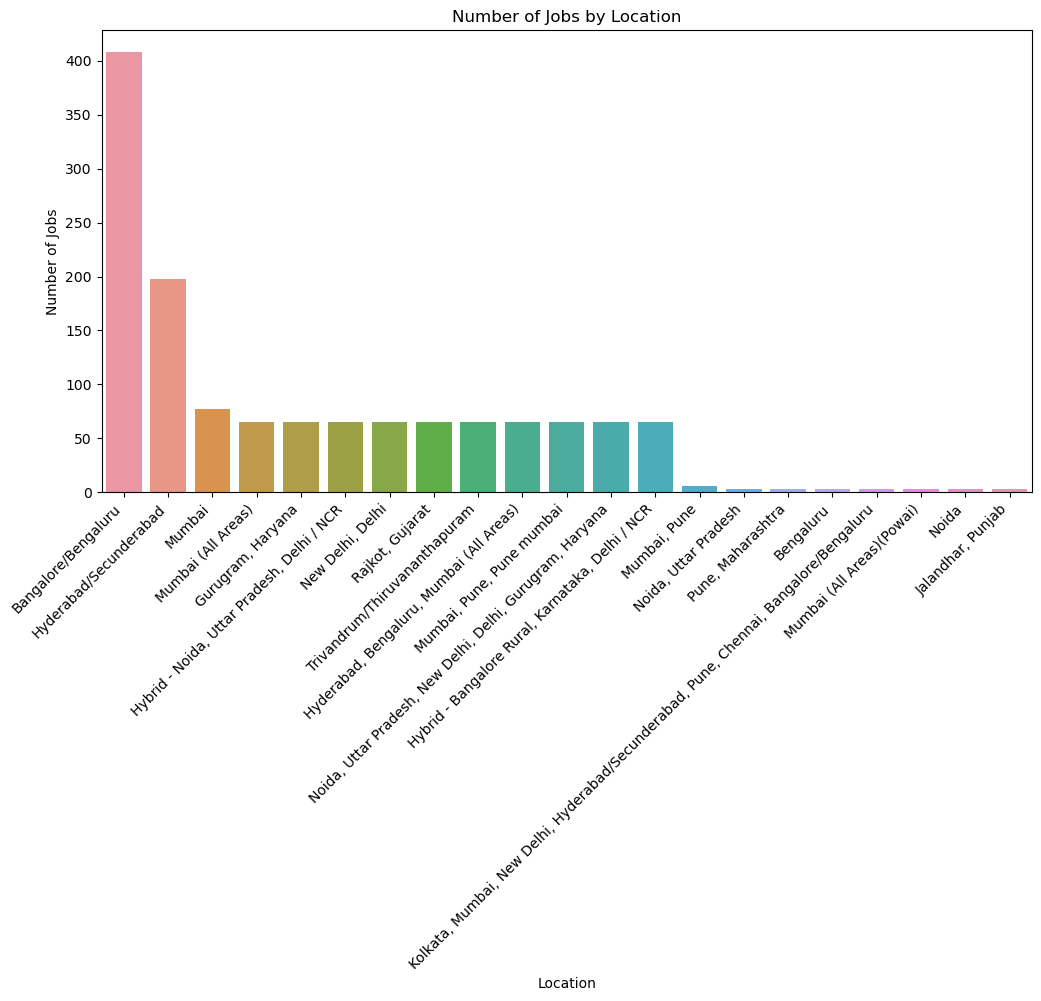

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a DataFrame
job_data = pd.read_csv('job_data.csv')

# Explore the DataFrame (e.g., view first few rows, summary statistics)
print(job_data.head())
print(job_data.describe())

# EDA: Count of jobs in each location
location_counts = job_data['Location'].value_counts()

# Visualization: Bar chart of job counts by location
plt.figure(figsize=(12, 6))
sns.barplot(x=location_counts.index, y=location_counts.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Location')
plt.ylabel('Number of Jobs')
plt.title('Number of Jobs by Location')
plt.show()


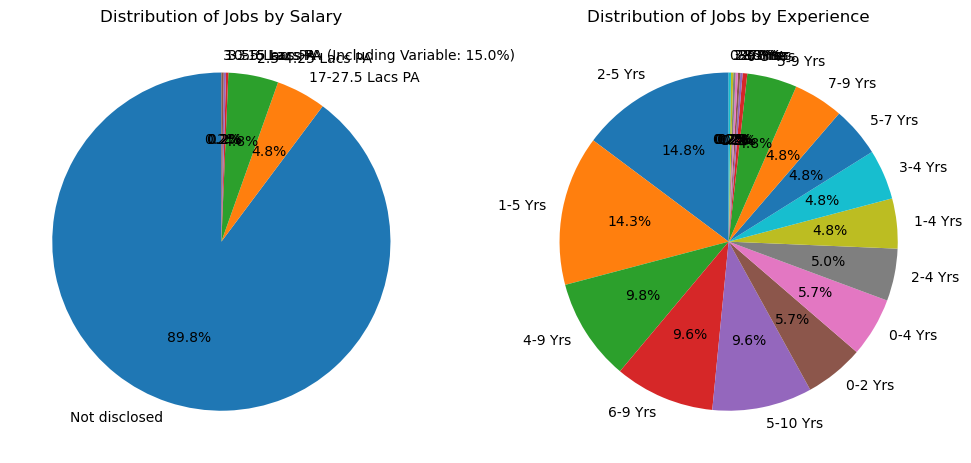

In [64]:
import matplotlib.pyplot as plt

# Assuming 'Salary' and 'Experience' columns are present in your DataFrame
salary_counts = result_df['Salary'].value_counts()
experience_counts = result_df['Experience'].value_counts()

# Plotting Pie Chart for Salary
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(salary_counts, labels=salary_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Jobs by Salary')

# Plotting Pie Chart for Experience
plt.subplot(1, 2, 2)
plt.pie(experience_counts, labels=experience_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Jobs by Experience')

plt.show()


In [43]:
import os
os.getcwd()


'C:\\Users\\Owner'